In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=18,9
import seaborn as sns

In [2]:
cmo_data = pd.read_csv("Monthly_data_cmo.csv")
cmo_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [3]:
cmo_data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [4]:
cmo_data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

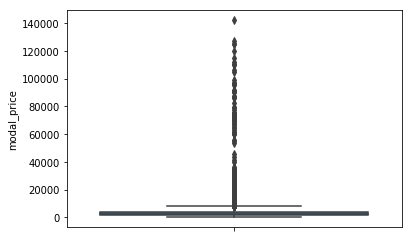

In [5]:
a = sns.boxplot(y="modal_price", data=cmo_data, whis=1.5)

In [6]:
from scipy.stats import iqr

In [7]:
Q1 = cmo_data.modal_price.quantile(0.25)
Q3 = cmo_data.modal_price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2807.0


In [9]:
cmo_data.loc[cmo_data['modal_price'] < (Q1 - 1.5 * IQR), 'modal_price']
cmo_data.loc[~(cmo_data['modal_price'] > (Q3 + 1.5 * IQR)), 'modal_price']

0        1463
1        1875
2        1731
3        1999
4        1900
5        2119
6        1373
7        1375
8        3647
9        5216
10       7150
11       7500
12       5233
13       7329
14       5700
15       7500
16       3313
17       3150
18       3603
19       3263
20       5500
21       2500
22       1133
23       3000
24       2138
25       1250
26       5750
27       5250
28       2833
29       1500
         ... 
62399    1994
62400    1771
62401    1400
62402    7949
62403    5800
62404    6419
62405    1041
62406     451
62407    1272
62408    1707
62409    2314
62410    1161
62411    2529
62412    1244
62413    2009
62414    2387
62415    1313
62416    6761
62417    6275
62418    4300
62419    2650
62420    1400
62421    1800
62422    1967
62423    1267
62424    6200
62425    5000
62426    6400
62427    2633
62428    3067
Name: modal_price, Length: 59896, dtype: int64

In [12]:
from datetime import datetime
cmo_data['dates'] = pd.to_datetime(cmo_data['date'])
cmo_data.index = cmo_data['date']

#The data is not sorted by date and also the date is repetitive for each commodity for each apmc
cmo_data.sort_values(by='dates', inplace=True)
cmo_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,dates
date,,,,,,,,,,,,
2014-09,Kurdwadi,Sorgum(Jawar),2014,September,454,1353,2610,1981,2014-09,Solapur,Maharashtra,2014-09-01
2014-09,Satara,Ladies Finger,2014,September,128,2435,3261,2848,2014-09,Satara,Maharashtra,2014-09-01
2014-09,Satara,Potato,2014,September,2988,2175,2488,2331,2014-09,Satara,Maharashtra,2014-09-01
2014-09,Satara,Ginger (Fresh),2014,September,199,3438,4813,4125,2014-09,Satara,Maharashtra,2014-09-01
2014-09,Satara,Ground Nut Pods (Dry),2014,September,1,3000,4000,3500,2014-09,Satara,Maharashtra,2014-09-01


In [14]:
cmo_data['Commodity'] = [i.lower() for i in cmo_data.Commodity.values]

/home/khwahish/.local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


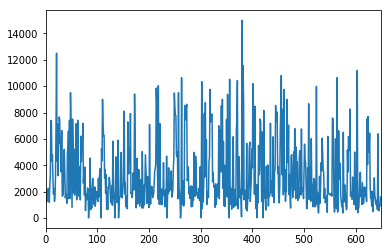

In [15]:
sns.tsplot(cmo_data.loc[cmo_data["APMC" ]== "Ahmednagar","modal_price"])

Firstly check which apmc has high frequency and also check frequency for the commodities in that region

In [16]:
cmo_data.APMC.value_counts()

Mumbai                    1538
Pune                      1513
Nagpur                    1340
Barshi                    1076
Jalgaon                   1055
Solapur                    984
Kamthi                     967
Shrirampur                 947
Kalyan                     932
Pune-Manjri                930
Aurangabad                 918
Rahata                     848
Karad                      831
Amarawati                  817
Kolhapur                   816
Nashik                     750
Pune-Pimpri                681
Ahmednagar                 649
Ramtek                     621
Satara                     549
Akluj                      542
Osmanabad                  510
Sangali                    462
Ratanagari                 457
Manchar                    455
Chandrapur-Ganjwad         454
Dhule                      434
Kalmeshwar                 415
Vadgaon Peth               415
Kalamb (Os)                407
                          ... 
Hingoli-Kanegaon Naka       13
Shirala 

In [17]:
cmo_data.query('APMC == "Mumbai"').Commodity.value_counts()

turmeric                 27
split black gram         27
shevga                   27
bitter gourd             27
flower                   27
arvi                     27
small gourd              27
carrot                   27
cowpea                   27
spilt gerrn gram         27
coconut                  27
elephant root            27
split lentil             27
sweet potato             27
green-peas               27
coriander (dry)          27
ginger (dry)             27
bottle gourd             27
green chilli             27
brinjal                  27
cummin                   27
ladies finger            27
squash gourd             27
cabbage                  27
curry leaves             27
split gram               27
fennel                   27
cucumber                 27
green peas (dry)         27
chillies(red)            27
                         ..
mosambi                  21
melon                    21
apple                    21
orange                   21
pineapple           

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

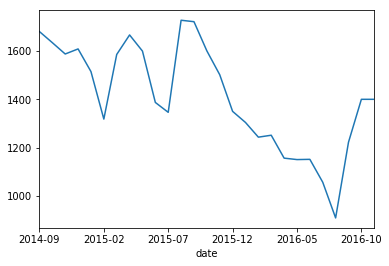

In [20]:
cmo_data.query('APMC == "Mumbai" & Commodity == "coconut"').modal_price.plot()

In [22]:
cmo_data.query('APMC == "Pune"').Commodity.value_counts()

sweet potato             27
ladies finger            27
flower                   27
beet root                27
lentil                   27
carrot                   27
chavli (shenga )         27
gram                     27
bottle gourd             27
green chilli             27
cluster bean             27
ghevda                   27
capsicum                 27
onion                    27
sorgum(jawar)            27
brinjal                  27
gr.nut kernels           27
green-peas               27
pavtta                   27
pumpkin                  27
bitter gourd             27
shevga                   27
ghosali(bhaji)           27
wal bhaji                27
green gram               27
wheat(husked)            27
wal papdi                27
potato                   27
bajri                    27
black gram               27
                         ..
turmeric                 18
mula shenga              15
nolkol                   10
lemon                    10
ground nut pods (dry

In [24]:
cmo_data.query('APMC == "Satara"').Commodity.value_counts()

garlic                   45
onion                    27
potato                   27
cucumber                 27
ginger (fresh)           27
green chilli             27
brinjal                  27
cabbage                  27
tomato                   27
flower                   27
pavtta                   27
capsicum                 27
cluster bean             27
bottle gourd             27
ladies finger            27
bitter gourd             27
shevga                   26
green-peas               26
carrot                   19
ghevda                   15
ground nut pods (dry)     7
sweet potato              6
Name: Commodity, dtype: int64

The seasonality cannot be seen per commodity for a particular region as the data points are less that way. So, we take sum of all commodities for a region and check monthly seasonality

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc641736f90>)


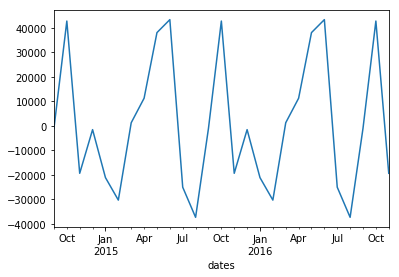

In [26]:
result = seasonal_decompose(cmo_data.query('APMC == "Mumbai"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6415c3250>)


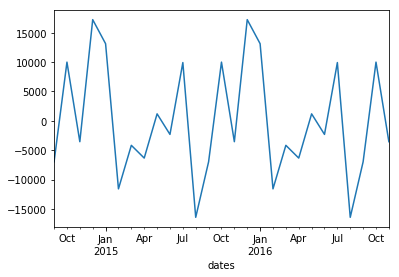

In [27]:
result = seasonal_decompose(cmo_data.query('APMC == "Pune"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc64175e890>)


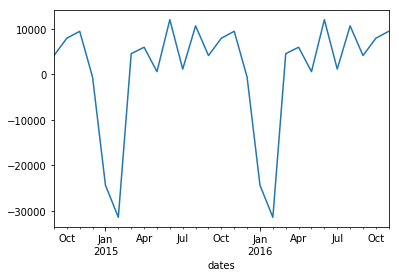

In [28]:
result = seasonal_decompose(cmo_data.query('APMC == "Nagpur"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6415ca490>)


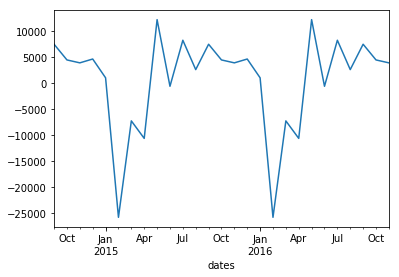

In [29]:
result = seasonal_decompose(cmo_data.query('APMC == "Barshi"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc641636350>)


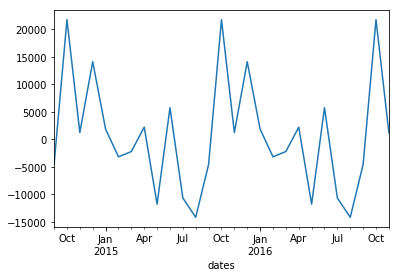

In [30]:
result = seasonal_decompose(cmo_data.query('APMC == "Jalgaon"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc64156ec50>)


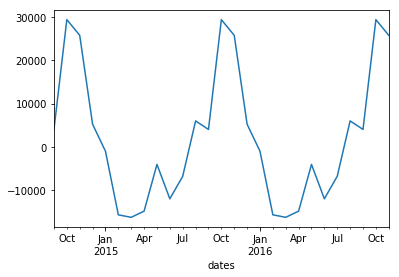

In [31]:
result = seasonal_decompose(cmo_data.query('APMC == "Solapur"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

In [32]:
cmo_data.Commodity.value_counts()

gram                     4115
wheat(husked)            4097
soybean                  3727
sorgum(jawar)            3716
pigeon pea (tur)         3477
maize                    2546
green gram               2425
bajri                    2346
onion                    1872
black gram               1675
ground nut pods (dry)    1068
cotton                   1063
tomato                   1021
brinjal                  1008
ladies finger             921
paddy-unhusked            911
cabbage                   893
green chilli              844
cucumber                  835
flower                    824
bitter gourd              822
potato                    718
cluster bean              701
rice(paddy-hus)           669
capsicum                  656
bottle gourd              596
garlic                    580
pomegranate               565
sesamum                   544
ginger (fresh)            518
                         ... 
gulchadi                    4
wood apple                  4
pitch     

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc64149ec90>)


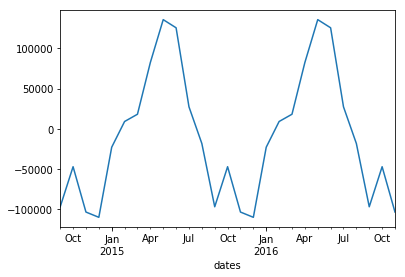

In [33]:
result = seasonal_decompose(cmo_data.query('Commodity == "gram"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc641565bd0>)


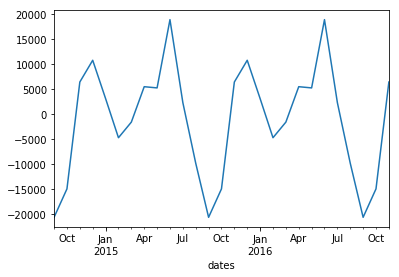

In [34]:
result = seasonal_decompose(cmo_data.query('Commodity == "wheat(husked)"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc641313ad0>)


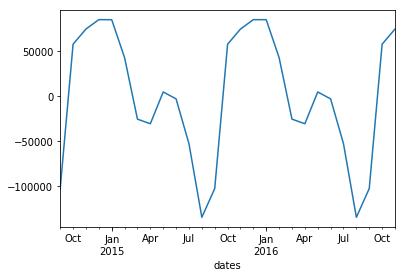

In [35]:
result = seasonal_decompose(cmo_data.query('Commodity == "soybean"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc641243fd0>)


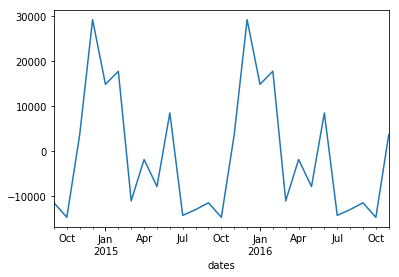

In [36]:
result = seasonal_decompose(cmo_data.query('Commodity == "sorgum(jawar)"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6411f1c10>)


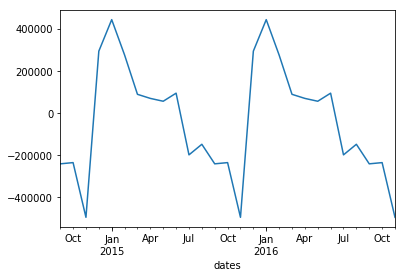

In [37]:
result = seasonal_decompose(cmo_data.query('Commodity == "pigeon pea (tur)"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

In all seasonality graphs, it is evident that the seasonality is yearly and is dependent on the type of crop the commodity is. Some crops which are grown in the Rabi or summer season, such as Jawar, are then harvested in the winter season and sold then, indicating a price hike in the winter months.

Similarly, there are crops such as Tur, are kharif crops grown during the rainy season, which lasts from June to October, post which we can see a hike in prices as the commodity reaches the market.

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc64110e450>)


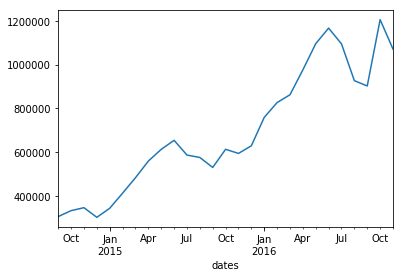

In [38]:
result = seasonal_decompose(cmo_data.query('Commodity == "gram"').groupby("dates").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.observed.plot())

Looking at the trend and observed line plot of the commodities, we can safely conclude that the seasonality type is neither additive nor multiplicative and is irrespective of the model chosen for decomposing.

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc641056f50>)


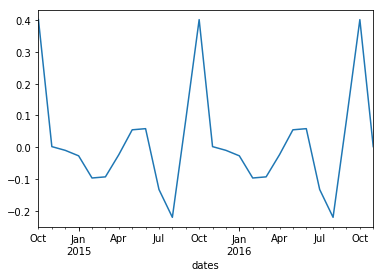

In [39]:
deseasonsoy = cmo_data.query('Commodity == "soybean"').groupby("dates").sum().modal_price.pct_change()
result = seasonal_decompose(deseasonsoy.iloc[1:], model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc64121bc10>)


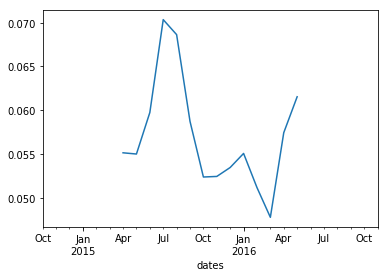

In [40]:
deseasongram = cmo_data.query('Commodity == "gram"').groupby("dates").sum().modal_price.pct_change()
result = seasonal_decompose(deseasongram.iloc[1:], model='additive', freq=12)
print("Seasonality: ",result.trend.plot())

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7fc64147a850>)


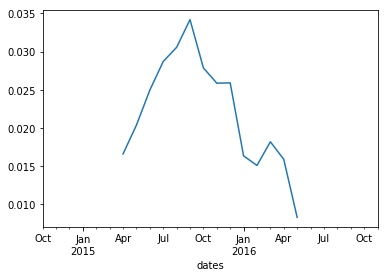

In [41]:
deseasonwheat = cmo_data.query('Commodity == "wheat(husked)"').groupby("dates").sum().modal_price.pct_change()
result = seasonal_decompose(deseasonwheat.iloc[1:], model='additive', freq=12)
print("Seasonality: ",result.trend.plot())